In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

In [10]:
# 1. Loading and preprocessing the image data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize images
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape for CNN input
X_test = X_test.reshape(-1, 28, 28, 1)

In [11]:
# 2. Defining the model's architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),  # Added another Conv2D layer
    MaxPooling2D((2, 2)),  # Added another MaxPooling2D layer
    Flatten(),
    Dense(128, activation="relu"),  # Increased the number of units in Dense layer
    Dense(64, activation="relu"),   # Added another hidden Dense layer
    Dense(10, activation="softmax")  # Output layer
])

In [12]:
# 3. Compile and train the model
model.compile(optimizer=SGD(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.6916 - loss: 1.1313 - val_accuracy: 0.9519 - val_loss: 0.1620
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9558 - loss: 0.1467 - val_accuracy: 0.9696 - val_loss: 0.0963
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9689 - loss: 0.1016 - val_accuracy: 0.9763 - val_loss: 0.0789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9752 - loss: 0.0779 - val_accuracy: 0.9781 - val_loss: 0.0679
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9808 - loss: 0.0628 - val_accuracy: 0.9839 - val_loss: 0.0514
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9832 - loss: 0.0538 - val_accuracy: 0.9833 - val_loss: 0.0483
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9858 - loss: 0.0466 - val_accuracy: 0.9843 - val_loss: 0.0475
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9876 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


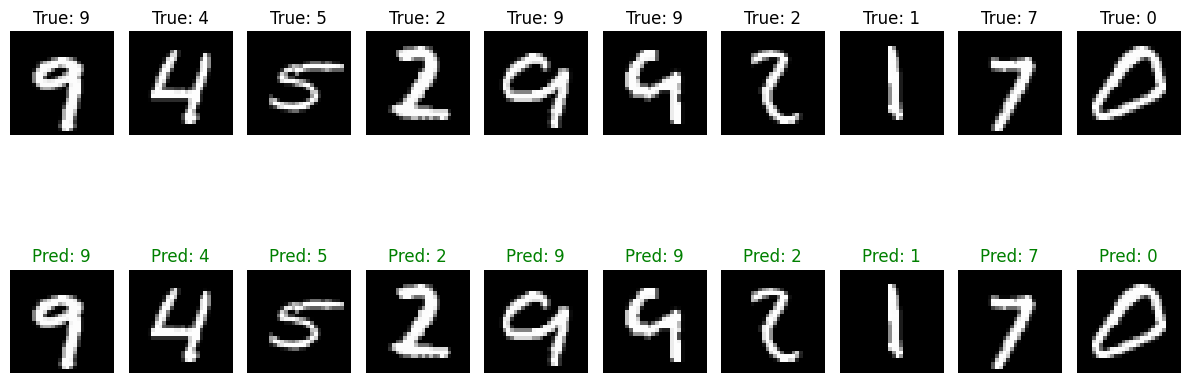

In [13]:
# Display images before and after classification
indices = np.random.choice(len(X_test), 10, replace=False)
plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices):
    img = X_test[idx].squeeze()
    true_label = y_test[idx]
    pred_label = np.argmax(model.predict(img.reshape(1, 28, 28, 1)), axis=1)[0]
    
    # Display original image with true label
    plt.subplot(2, 10, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {true_label}")
    plt.axis('off')
    
    # Display image again with predicted label, highlight if incorrect
    plt.subplot(2, 10, i + 11)
    plt.imshow(img, cmap="gray")
    title_color = "green" if true_label == pred_label else "red"
    plt.title(f"Pred: {pred_label}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
# 4. Estimating the model's performance
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}, Test accuracy: {score[1]:.4f}')

Test loss: 0.0378, Test accuracy: 0.9884


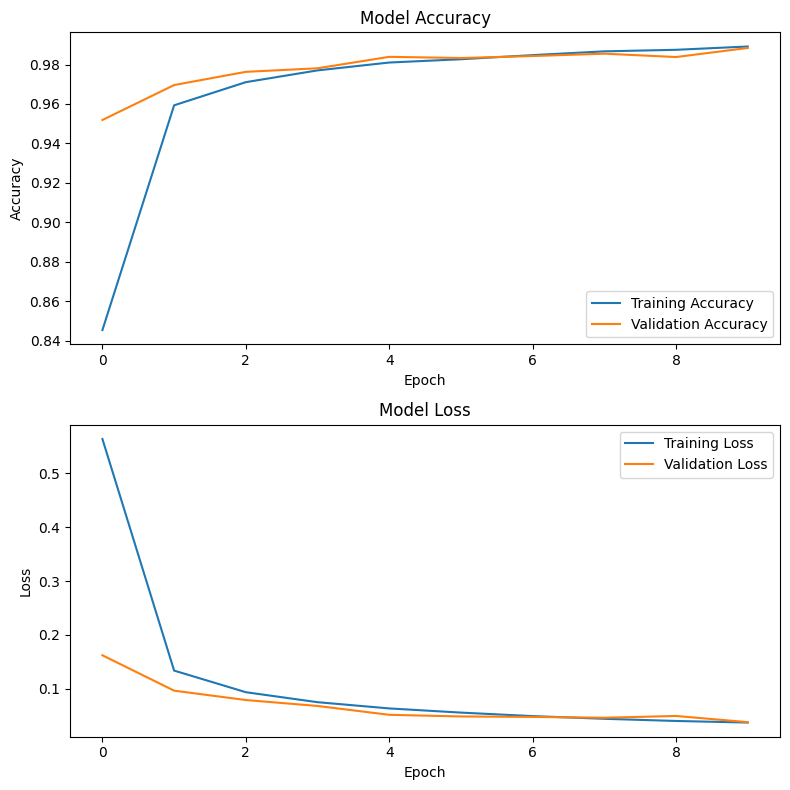

In [15]:
# Plotting training metrics (accuracy and loss)
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()





In [16]:
# Save the model and weights
model.save("model_digit.h5")
print("Saved model to disk")

Saved model to disk
